# Lab 4
The goal of this practical is to investigate the logistic regression model. This is broken down into four parts:
- [Part A](#Part-A:-Investigating-line-search): investigating line search as a method for optimising black box functions
- [Part B](PartB.ipynb): applying Newton's method and steepest descent as optimisation methods for two-dimensional functions
- [Part C](PartC.ipynb): using the same optimisation methods for fitting a logistic regression model to simple 2D data
- [Part D](PartD.ipynb): implementing the logistic regression model for face detection by using a binary classifier on image data

# Part A: Investigating line search
Look through the code to understand the goal of this part, and then fill in the 'TO DO' sections - starting with implementing the ['`line_search`'](#Optimisation-procedure) method 

### Import modules

In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('machinevision.mplstyle')
from numpy import arange, array, exp, sin
from scipy.optimize import fmin

# Define functions to optimise
You can think of each of these functions as being a 'black box'

In [2]:
def my_function(x):
    if x < 0:
        return -x
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2)


def my_function2(x):
    if x < 0:
        return -x - exp(-0.5 * (-0.2 / 0.025)**2)
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2) - exp(-0.5 * ((x - 0.2) / 0.025)**2)

# Optimisation procedure

In [3]:
def line_search(function, start, end, tolerance):
    a = start
    d = end

    while (d - a) > tolerance:
        print('Current Search Region is {:6.6f} to {:6.6f}'.format(a, d))
        break
        # TO DO - Implement a line search iteration:
        #
        # step 1: Remove the break above
        # step 2: Calculate intermediate positions b and c, 1/3 and 2/3 of the way through interval
        #         (between a and d), respectively
        #
        # step 3:  Evaluate function at points b and c
        #
        # step 4:  Update point a or d depending on the values of those evaluations

    return a, function(a)

# Construct data

In [4]:
function = my_function

x = arange(0, 1, step=0.01)
w = array([function(x_i) for x_i in x])

# Perform optimisation

### Line search

In [5]:
min_x, min_value = line_search(function, start=0, end=1, tolerance=1e-4)

Current Search Region is 0.000000 to 1.000000


### SciPy optimisation
There is a SciPy method that can do this optimisation for you given a function.

**TO DO:** Look up the help page for the function `fmin`, you can also try `?fmin` in a new jupyter cell to get an information about functions.

In [6]:
scipy_min_x = fmin(function, x0=0, xtol=1e-4)
scipy_min_value = function(scipy_min_x)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 24
         Function evaluations: 48


# Visualise results
If everything is working correctly the optimised `x` from the line search and the result from `fmin` should coincide, and appear to be at the function's minimum

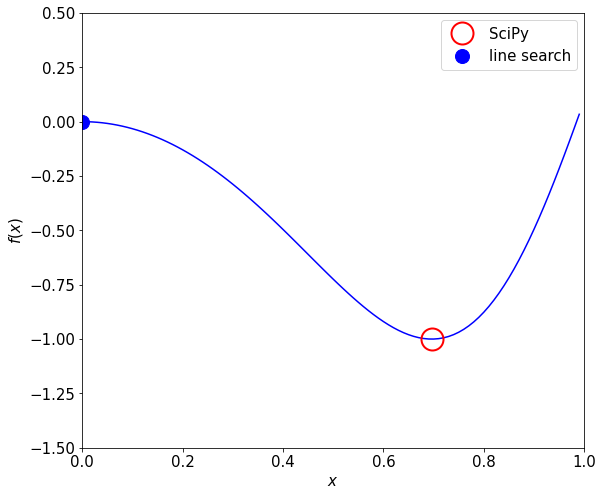

In [7]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(x, w, 'b-')
ax.plot(scipy_min_x, scipy_min_value, 'ro', markeredgewidth=2, markersize=22, label='SciPy')
ax.plot(min_x, min_value, 'bo', fillstyle='full', label='line search')

ax.set(xlabel='$x$', ylabel='$f(x)$', xlim=[0, 1], ylim=[-1.5, 0.5])
plt.legend();

## TO DO
### Repeat the process for `myfunction2`
Try using different initialisations in order to find the *global* minimum